## Project: Evaluation of Student Performance

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href='#split'>Split Data</a></li>
<li><a href='#model'>Train Model</a></li>
<li><a href="#con">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This dataset is from Freddie Mac and includes characteristics of mortages that Freddie Mac has
purchased in the past from banks. The dataset also includes a binary variable indicating if each mortage
entered default at any time during the lifetime of the loan. Freddie Mac would like you to develop a
machine learning algorithm to predict the probability of default for future loans. They would like an
algorithm or algorithms that will allow them to make decisions about what mortages to buy in the
future.

### Columns Description

01- `Credit.Score`: A number, prepared by third parties, summarizing the borrower’s creditworthiness
<br>02- `First.Time.Homebuyer.Flag`: Have you ever purchased a home?['N' nan 'Y']
<br>03- `Metropolitan.Statistical.Area..MSA..Or.Metropolitan.Division`: This disclosure will be based on the designation of the Metropolitan Statistical Area
<br>04- `Number.of.Units`:Denotes whether the mortgage is a one, two, three, or four-unit property
<br>05- `Occupancy.Status`:Occupancy Status Units['O' 'I' 'S']
<br>06- `Original.Combined.Loan.to.Value..CLTV.`:In the case of a purchase mortgage loan, the ratio is obtained by dividing the original mortgage loan amount
<br>07- `Original.Debt.to.Income..DTI..Ratio`:Disclosure of the debt to income ratio
<br>08- `Original.UPB`:Original UPB
<br>09- `Original.Loan.to.Value..LTV.`:Default is high compared to rest
<br>10- `Original.Interest.Rate`:Original Interest Rate
<br>11- `Property.State`:Property State
<br>12- `Property.Type`:Denotes whether the property type secured by the mortgage is a condominium, leasehold, planned unit development (PUD), cooperative share, manufactured home, or Single-Family home.['SF' 'PU' 'CP' 'CO' 'MH' 'LH' nan]
<br>13- `Postal.Code`:Postal Code
<br>14- `Loan.Sequence.Number`:Loan Sequence Number
<br>15- `Loan.Purpose`:(Indicates whether the mortgage loan is a (C) Cash- out Refinance mortgage, (N)No Cash-out Refinance mortgage, or a (P)Purchase mortgage) ['P' 'N' 'C']
<br>16- `Original.Loan.Term`:A calculation of the number of scheduled monthly payments of the mortgage based on the First Payment Date and Maturity Date.
<br>17- `Number.of.Borrowers`:The number of Borrower(s) who are obligated to repay the mortgage note secured by the mortgaged property
<br>18- `Seller.Name`:Seller Name
<br>19- `Servicer.Name`:Servicer Name
<br>20- `Program.Indicator`:Program Indicator
<br>21- `Property.Valuation.Method`:Property Valuation Method
<br>22- `Default`:Target value that contain 0 for Off and 1 for ON

<a id='wrangling'></a>
## Data Wrangling

#### Libraries used

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

#### Read data from HistoricMortages.csv

In [5]:
data=pd.read_csv('HistoricMortages.csv')

#### Show dataset  

In [6]:
data.head()

,Credit.Score,First.Time.Homebuyer.Flag,Metropolitan.Statistical.Area..MSA..Or.Metropolitan.Division,Mortgage.Insurance.Percentage..MI...,Number.of.Units,Occupancy.Status,Original.Combined.Loan.to.Value..CLTV.,Original.Debt.to.Income..DTI..Ratio,Original.UPB,Original.Loan.to.Value..LTV.,...,Postal.Code,Loan.Sequence.Number,Loan.Purpose,Original.Loan.Term,Number.of.Borrowers,Seller.Name,Servicer.Name,Program.Indicator,Property.Valuation.Method,Default
0,778,N,NaN,0,1,P,79,33.0,226000.0,79.0,...,67500.0,F21Q20000001,N,360.0,1.0,Other sellers,Other servicers,9,1.0,0.0
1,787,N,NaN,0,1,P,80,24.0,277000.0,80.0,...,40400.0,F21Q20000002,C,360.0,2.0,Other sellers,U.S. BANK N.A.,9,2.0,0.0
2,712,N,NaN,0,1,P,71,42.0,197000.0,71.0,...,67100.0,F21Q20000003,P,360.0,2.0,Other sellers,Other servicers,9,2.0,0.0
3,790,N,NaN,0,1,P,69,24.0,168000.0,69.0,...,55700.0,F21Q20000004,C,360.0,2.0,Other sellers,Other servicers,9,2.0,0.0
4,662,N,45780.0,25,1,P,87,34.0,498000.0,87.0,...,43400.0,F21Q20000005,N,360.0,2.0,Other sellers,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",9,2.0,0.0


#### Data size

In [7]:
data.shape

(210681, 23)

#### Display columns names

In [14]:
def show_columns(dt):
    print("Columns names:")
    print('*'*30)
    for i in range(len(dt.columns)):
        print(i+1,dt.columns[i])
show_columns(data)

Columns names:
******************************
1 Credit.Score
2 First.Time.Homebuyer.Flag
3 Metropolitan.Statistical.Area..MSA..Or.Metropolitan.Division
4 Mortgage.Insurance.Percentage..MI...
5 Number.of.Units
6 Occupancy.Status
7 Original.Combined.Loan.to.Value..CLTV.
8 Original.Debt.to.Income..DTI..Ratio
9 Original.UPB
10 Original.Loan.to.Value..LTV.
11 Original.Interest.Rate
12 Property.State
13 Property.Type
14 Postal.Code
15 Loan.Sequence.Number
16 Loan.Purpose
17 Original.Loan.Term
18 Number.of.Borrowers
19 Seller.Name
20 Servicer.Name
21 Program.Indicator
22 Property.Valuation.Method
23 Default


Display dataset info, datatypes, entries count

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210681 entries, 0 to 210680
Data columns (total 23 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   Credit.Score                                                  210681 non-null  int64  
 1   First.Time.Homebuyer.Flag                                     210681 non-null  object 
 2   Metropolitan.Statistical.Area..MSA..Or.Metropolitan.Division  189560 non-null  float64
 3   Mortgage.Insurance.Percentage..MI...                          210681 non-null  int64  
 4   Number.of.Units                                               210681 non-null  int64  
 5   Occupancy.Status                                              210681 non-null  object 
 6   Original.Combined.Loan.to.Value..CLTV.                        210681 non-null  int64  
 7   Original.Debt.to.Income..DTI..Ratio                     

## Data Cleaning

>01- Drop irrelevant columns
<br>02- Exploring nulls and remove it
<br>03- Exploring duplicates and remove it
<br>04- change some columns name

#### 01- Drop irrelevant columns

The dataset used contains information that is unavailable at the time of loan application. We will drop these columns before starting with our analysis. The columns we will drop are:

- MORTGAGE_INSURANCE_PERCENTAGE
- ORIGINAL_UPB
- ORIGINAL_INTEREST_RATE

Other columns we will drop are:

We will drop `PROPERTY_STATE` as this information is encoded in the MSA column.

`LOAN_SEQUENCE_NUMBER`and `Postal.Code` are a unique id assigned to each loan. As it provides no information we will drop this column.

`SELLER_NAME` and `SERVICER_NAME` are dependent loan activity and since this information is not available at the time of loan request we will drop these columns.

In [140]:
new_dt=data.drop(columns=['Mortgage.Insurance.Percentage..MI...','Original.UPB','Original.Interest.Rate','Property.State','Loan.Sequence.Number','Seller.Name','Servicer.Name','Postal.Code'])

In [141]:
show_columns(new_dt)

Columns names:
******************************
1 Credit.Score
2 First.Time.Homebuyer.Flag
3 Metropolitan.Statistical.Area..MSA..Or.Metropolitan.Division
4 Number.of.Units
5 Occupancy.Status
6 Original.Combined.Loan.to.Value..CLTV.
7 Original.Debt.to.Income..DTI..Ratio
8 Original.Loan.to.Value..LTV.
9 Property.Type
10 Loan.Purpose
11 Original.Loan.Term
12 Number.of.Borrowers
13 Program.Indicator
14 Property.Valuation.Method
15 Default


#### 02- Exploring nulls and Fill it

In [142]:
new_dt.isnull().sum()

Credit.Score                                                        0
First.Time.Homebuyer.Flag                                           0
Metropolitan.Statistical.Area..MSA..Or.Metropolitan.Division    21121
Number.of.Units                                                     0
Occupancy.Status                                                    0
Original.Combined.Loan.to.Value..CLTV.                              0
Original.Debt.to.Income..DTI..Ratio                                 1
Original.Loan.to.Value..LTV.                                        1
Property.Type                                                       1
Loan.Purpose                                                        1
Original.Loan.Term                                                  1
Number.of.Borrowers                                                 1
Program.Indicator                                                   1
Property.Valuation.Method                                           1
Default             

In [143]:
new_dt['Metropolitan.Statistical.Area..MSA..Or.Metropolitan.Division'].fillna(value=new_dt['Metropolitan.Statistical.Area..MSA..Or.Metropolitan.Division'].median(),inplace=True)

In [144]:
new_dt.isnull().sum()

Credit.Score                                                    0
First.Time.Homebuyer.Flag                                       0
Metropolitan.Statistical.Area..MSA..Or.Metropolitan.Division    0
Number.of.Units                                                 0
Occupancy.Status                                                0
Original.Combined.Loan.to.Value..CLTV.                          0
Original.Debt.to.Income..DTI..Ratio                             1
Original.Loan.to.Value..LTV.                                    1
Property.Type                                                   1
Loan.Purpose                                                    1
Original.Loan.Term                                              1
Number.of.Borrowers                                             1
Program.Indicator                                               1
Property.Valuation.Method                                       1
Default                                                         1
dtype: int

In [145]:
row_null=new_dt[new_dt['Original.Debt.to.Income..DTI..Ratio'].isnull()].index

In [146]:
new_dt.drop(row_null,inplace=True)

In [147]:
new_dt.isnull().sum()

Credit.Score                                                    0
First.Time.Homebuyer.Flag                                       0
Metropolitan.Statistical.Area..MSA..Or.Metropolitan.Division    0
Number.of.Units                                                 0
Occupancy.Status                                                0
Original.Combined.Loan.to.Value..CLTV.                          0
Original.Debt.to.Income..DTI..Ratio                             0
Original.Loan.to.Value..LTV.                                    0
Property.Type                                                   0
Loan.Purpose                                                    0
Original.Loan.Term                                              0
Number.of.Borrowers                                             0
Program.Indicator                                               0
Property.Valuation.Method                                       0
Default                                                         0
dtype: int

#### 03- Exploring duplicates and remove it

In [148]:
new_dt.duplicated().sum()

232

In [149]:
row_dup=new_dt[new_dt.duplicated()].index
row_dup

Int64Index([    83,    112,    558,    560,   1007,   1689,   4698,   5281,
              5771,   5776,
            ...
            201087, 201240, 201805, 203958, 204274, 205682, 206388, 206589,
            207323, 209900],
           dtype='int64', length=232)

In [150]:
new_dt.drop(row_dup,inplace=True)

In [151]:
new_dt.duplicated().sum()

0

#### 04- change some columns name

In [177]:
new_dt.rename(columns={
    'Metropolitan.Statistical.Area..MSA..Or.Metropolitan.Division':'Metropolitan_Statistical_Area'
},inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

Company X offers home loans. The customer submits a loan application, and Company X wants to determine if the borrower will default on the loan. If Company X determines the borrower is likely to default on the loan, then Company X will deny the borrower's loan application

#### how many loans on and off?

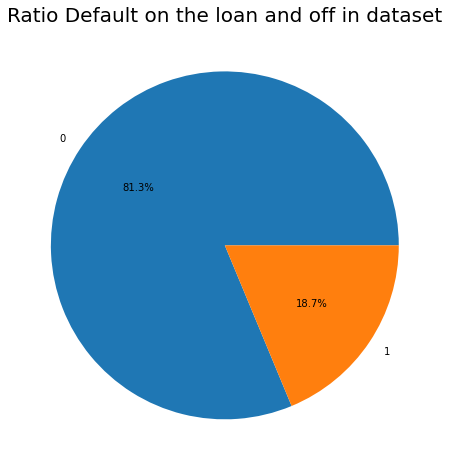

In [179]:
d_count=new_dt['Default'].value_counts()
plt.figure(figsize=(16,8))
plt.title('Ratio Default on the loan and off in dataset',size=20)
plt.pie(d_count,labels=d_count.index.astype(int),autopct='%0.1f%%')
plt.show()

#### Split columns into numerical and categorical columns

categorical columns

In [180]:
cat=new_dt.select_dtypes('object')
show_columns(cat)

Columns names:
******************************
1 First.Time.Homebuyer.Flag
2 Occupancy.Status
3 Property.Type
4 Loan.Purpose
5 Program.Indicator


#### Then we will analysis and visualize all columns with target column (default) to define correlation

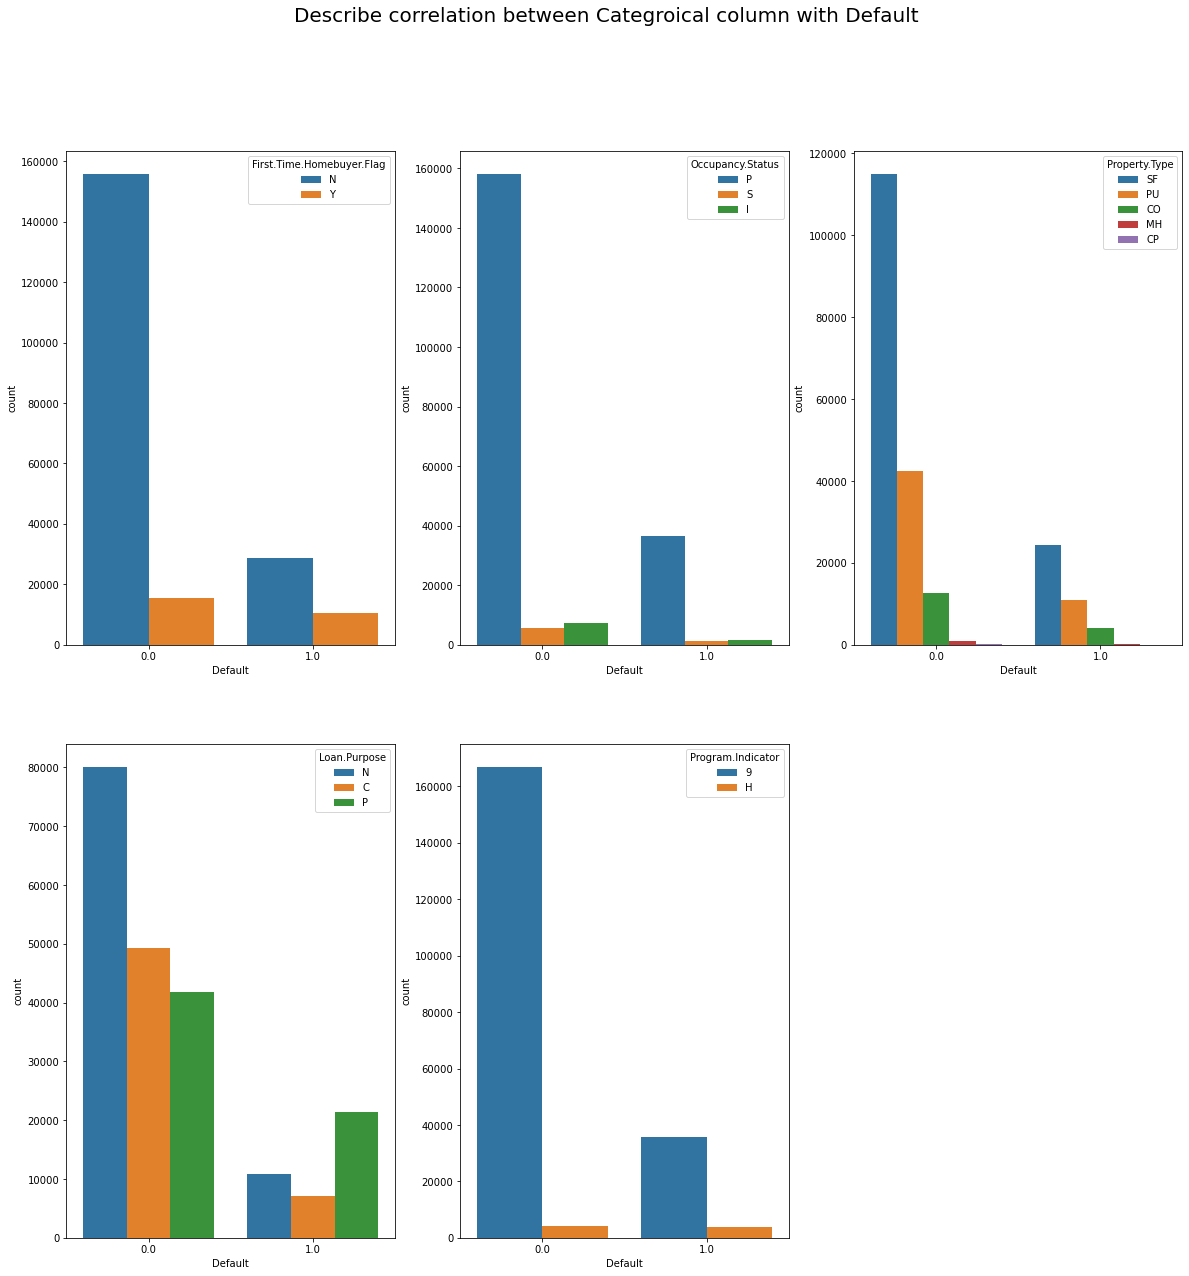

In [181]:
plt.figure(figsize=(20,20))
plt.suptitle('Describe correlation between Categroical column with Default',size=20)
for i in range(len(cat.columns)):
    plt.subplot(2,3,i+1)
    sns.countplot(x='Default',hue=cat.columns[i],data=new_dt)

1- FIRST_TIME_HOMEBUYER_FLAG , (will reside in the mortgaged property as a primary residence) are not defaulter, (individual who is purchasing the mortgaged property) are found as default

2- OCCUPANCY_STATUS , Primary Residence has impact on outcome(default), (Investment Property,Second Home) are no impact on outcome.

3- PROPERTY TYPE: Single-Family home has impact on outcome default , other have null(no impact)

4- LOAN PURPOSE: All(N,C,P) have same amount/count impact on outcome(default)

5- PROGRAM INDICATOR: value 9 has impact on outcomes default and H no impact 



Numerical Columns

In [182]:
num=new_dt.select_dtypes(['int64','float64'])
show_columns(num)

Columns names:
******************************
1 Credit.Score
2 Metropolitan_Statistical_Area
3 Number.of.Units
4 Original.Combined.Loan.to.Value..CLTV.
5 Original.Debt.to.Income..DTI..Ratio
6 Original.Loan.to.Value..LTV.
7 Original.Loan.Term
8 Number.of.Borrowers
9 Property.Valuation.Method
10 Default


In [183]:
traget=num['Default']

In [184]:
num1=num.drop(columns='Default')

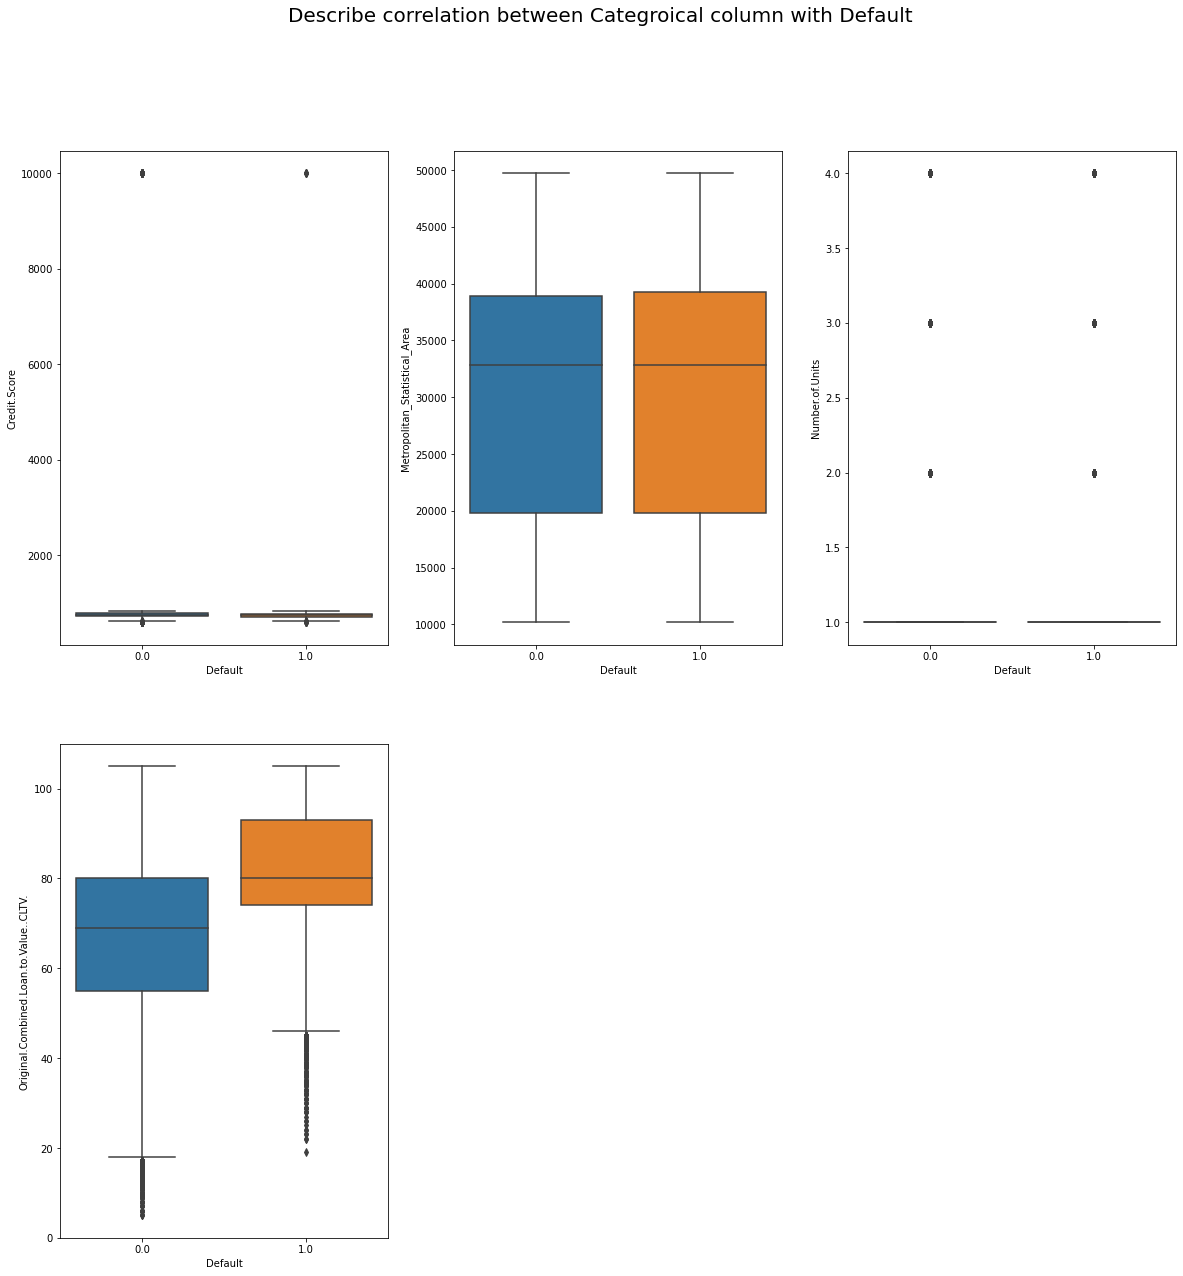

In [185]:
plt.figure(figsize=(20,20))
plt.suptitle('Describe correlation between numerical column with Default',size=20)
for i in range(len(num1.columns)-5):
    plt.subplot(2,3,i+1)
    sns.boxplot(x='Default',y=num1.columns[i],data=new_dt)

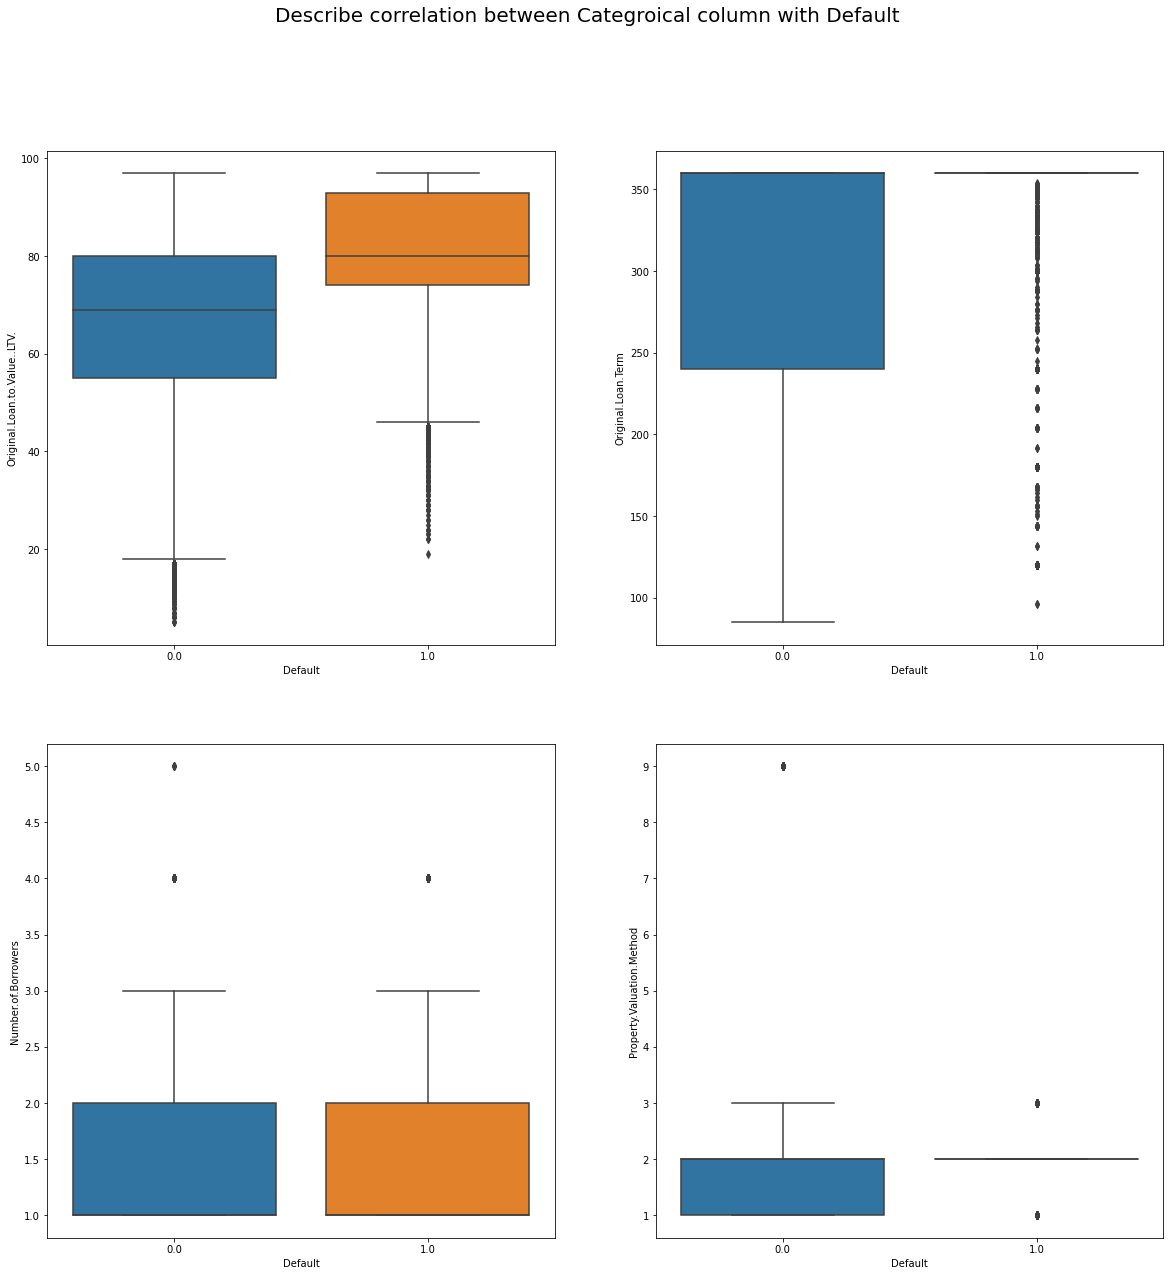

In [169]:
plt.figure(figsize=(20,20))
plt.suptitle('Describe correlation between Categroical column with Default',size=20)
for i in range(5,len(num1.columns)):
    plt.subplot(2,2,i-5+1)
    sns.boxplot(x='Default',y=num1.columns[i],data=new_dt)

1- CREDIT_SCORE:has outliers in both cases(default and non-default)
<br>2- METROPOLITAN_STATISTICAL_AREA:does not have outliers. Both looks same.
<br>3- NUMBER_OF_UNITS: is categorical variable and descrete value like 1,2,3,4
<br>4- ORIGINAL_COMBINED_LOAN_TO_VALUE: Default is high compared to rest
<br>5- ORIGINAL_DEBT_TO_INCOME_RATIO: Default is high compared to rest
<br>6- ORIGINAL_LOAN_TO_VALUE:Default is high compared to rest
<br>7- ORIGINAL_LOAN_TREM: Default is high compared to rest
<br>8- NUMBER_OF_BORROWERS:Has no impact. Both are same.
<br>9- Property.Valuation.Method: Has no impact. Both are same.

#### Summary Correlation with heat map

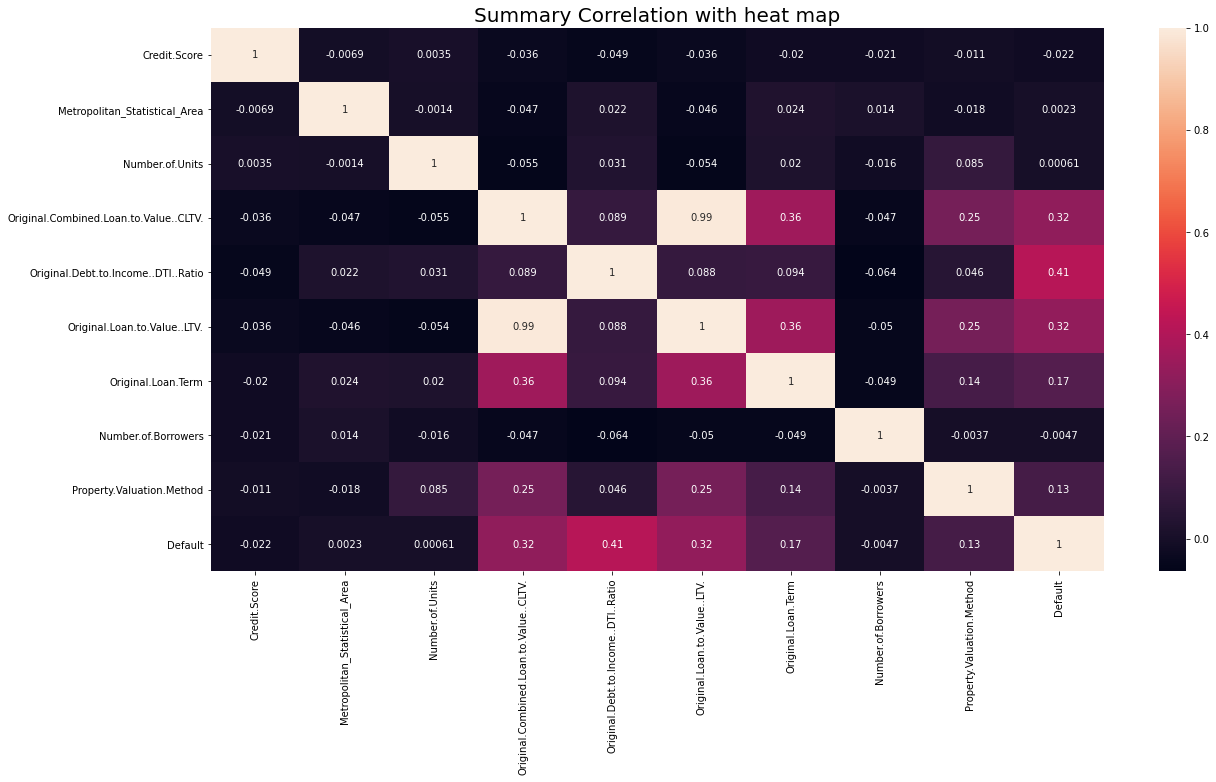

In [190]:
plt.figure(figsize=(20,10))
plt.title('Summary Correlation with heat map',size=20)
sns.heatmap(new_dt.corr(),annot=True)
plt.show()

In [192]:
new_dt.corr()['Default'].sort_values()

Credit.Score                             -0.021876
Number.of.Borrowers                      -0.004664
Number.of.Units                           0.000610
Metropolitan_Statistical_Area             0.002278
Property.Valuation.Method                 0.130367
Original.Loan.Term                        0.171414
Original.Combined.Loan.to.Value..CLTV.    0.321369
Original.Loan.to.Value..LTV.              0.323051
Original.Debt.to.Income..DTI..Ratio       0.414952
Default                                   1.000000
Name: Default, dtype: float64

we have there some correlation with Default:
- Original.Debt.to.Income..DTI..Ratio
- Original.Debt.to.Income..DTI..Ratio
- Original.Debt.to.Income..DTI..Ratio
- Original.Loan.Term
- Property.Valuation.Method

# Preprocessing on data

#### convert data categorical to numerical

In [229]:
converted_columns=pd.get_dummies(cat)

In [230]:
converted_columns

,First.Time.Homebuyer.Flag_N,First.Time.Homebuyer.Flag_Y,Occupancy.Status_I,Occupancy.Status_P,Occupancy.Status_S,Property.Type_CO,Property.Type_CP,Property.Type_MH,Property.Type_PU,Property.Type_SF,Loan.Purpose_C,Loan.Purpose_N,Loan.Purpose_P,Program.Indicator_9,Program.Indicator_H
0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
1,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0
2,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0
3,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0
4,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210675,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
210676,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1
210677,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0
210678,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0


In [244]:
new_dt1=new_dt.drop(columns=cat.columns)

In [252]:
new_dt2=pd.concat([new_dt1,converted_columns],axis=1)
new_dt2

,Credit.Score,Metropolitan_Statistical_Area,Number.of.Units,Original.Combined.Loan.to.Value..CLTV.,Original.Debt.to.Income..DTI..Ratio,Original.Loan.to.Value..LTV.,Original.Loan.Term,Number.of.Borrowers,Property.Valuation.Method,Default,...,Property.Type_CO,Property.Type_CP,Property.Type_MH,Property.Type_PU,Property.Type_SF,Loan.Purpose_C,Loan.Purpose_N,Loan.Purpose_P,Program.Indicator_9,Program.Indicator_H
0,778,32820.0,1,79,33.0,79.0,360.0,1.0,1.0,0.0,...,0,0,0,0,1,0,1,0,1,0
1,787,32820.0,1,80,24.0,80.0,360.0,2.0,2.0,0.0,...,0,0,0,0,1,1,0,0,1,0
2,712,32820.0,1,71,42.0,71.0,360.0,2.0,2.0,0.0,...,0,0,0,0,1,0,0,1,1,0
3,790,32820.0,1,69,24.0,69.0,360.0,2.0,2.0,0.0,...,0,0,0,0,1,1,0,0,1,0
4,662,45780.0,1,87,34.0,87.0,360.0,2.0,2.0,0.0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210675,788,33460.0,1,80,26.0,80.0,360.0,2.0,1.0,0.0,...,0,0,0,0,1,0,1,0,1,0
210676,753,38060.0,1,92,43.0,92.0,360.0,1.0,2.0,1.0,...,1,0,0,0,0,0,0,1,0,1
210677,786,33460.0,1,80,30.0,80.0,360.0,1.0,1.0,0.0,...,0,0,0,1,0,0,1,0,1,0
210678,805,47894.0,1,75,28.0,75.0,360.0,1.0,2.0,0.0,...,1,0,0,0,0,1,0,0,1,0


In [253]:
show_columns(new_dt2)

Columns names:
******************************
1 Credit.Score
2 Metropolitan_Statistical_Area
3 Number.of.Units
4 Original.Combined.Loan.to.Value..CLTV.
5 Original.Debt.to.Income..DTI..Ratio
6 Original.Loan.to.Value..LTV.
7 Original.Loan.Term
8 Number.of.Borrowers
9 Property.Valuation.Method
10 Default
11 First.Time.Homebuyer.Flag_N
12 First.Time.Homebuyer.Flag_Y
13 Occupancy.Status_I
14 Occupancy.Status_P
15 Occupancy.Status_S
16 Property.Type_CO
17 Property.Type_CP
18 Property.Type_MH
19 Property.Type_PU
20 Property.Type_SF
21 Loan.Purpose_C
22 Loan.Purpose_N
23 Loan.Purpose_P
24 Program.Indicator_9
25 Program.Indicator_H


In [356]:
new_dt2.drop(columns='Default',inplace=True)

#### Normalize features by scalling 

In [341]:
from sklearn.preprocessing import StandardScaler 

In [342]:
scaler=StandardScaler()

In [357]:
new_dt3=scaler.fit_transform(new_dt2)

In [358]:
new_dt3

array([[ 0.19614218,  0.20270136, -0.11949225, ..., -0.65443592,
         0.19889042, -0.19889042],
       [ 0.26762832,  0.20270136, -0.11949225, ..., -0.65443592,
         0.19889042, -0.19889042],
       [-0.32808956,  0.20270136, -0.11949225, ...,  1.52803347,
         0.19889042, -0.19889042],
       ...,
       [ 0.25968542,  0.26221294, -0.11949225, ..., -0.65443592,
         0.19889042, -0.19889042],
       [ 0.41060062,  1.60438511, -0.11949225, ..., -0.65443592,
         0.19889042, -0.19889042],
       [ 0.13259894,  0.26221294, -0.11949225, ...,  1.52803347,
         0.19889042, -0.19889042]])

In [359]:
X=new_dt3
y=traget.astype(int)

<a id='split'></a>
# Split data into train and Valid sets for model

In [360]:
from sklearn.model_selection import train_test_split

In [361]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=42)

In [362]:
print(f"Train set Size : {X_train.shape}")
print(f"Valid set Size : {X_valid.shape}")

Train set Size : (168358, 24)
Valid set Size : (42090, 24)


<a id='model'></a>
# Train the Model

In [349]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import log_loss

### linear model: LogisticRegression

In [350]:
model1=LogisticRegression()

In [363]:
model1.fit(X_train,y_train)

LogisticRegression()

#### Model Predict

In [364]:
y_valid_pred1=model1.predict(X_valid)

In [365]:
y_valid_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [366]:
y_valid.values

array([0, 1, 0, ..., 0, 1, 0])

#### Model Evaluation

In [367]:
print(f"Train Accuracy = {round(model1.score(X_train,y_train),2)*100} %")
print(f"Valid Accuracy = {round(accuracy_score(y_valid,y_valid_pred1),2)*100} %")

Train Accuracy = 90.0 %
Valid Accuracy = 89.0 %


In [368]:
print(classification_report(y_valid,y_valid_pred1))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     34262
           1       0.74      0.66      0.70      7828

    accuracy                           0.89     42090
   macro avg       0.83      0.81      0.82     42090
weighted avg       0.89      0.89      0.89     42090



In [369]:
print(confusion_matrix(y_valid,y_valid_pred1))

[[32475  1787]
 [ 2635  5193]]


### DecisionTree Classifier Model

In [370]:
model2=DecisionTreeClassifier()
model2.fit(X_train,y_train)

DecisionTreeClassifier()

#### Model Predict

In [371]:
y_valid_pred2=model2.predict(X_valid)

In [372]:
y_valid_pred2

array([0, 0, 0, ..., 0, 1, 0])

In [373]:
y_valid.values

array([0, 1, 0, ..., 0, 1, 0])

#### Model Evaluation

In [374]:
print(f"Train Accuracy = {round(model2.score(X_train,y_train),2)*100} %")
print(f"Valid Accuracy = {round(accuracy_score(y_valid,y_valid_pred2),2)*100} %")

Train Accuracy = 100.0 %
Valid Accuracy = 85.0 %


In [375]:
print(classification_report(y_valid,y_valid_pred2))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     34262
           1       0.60      0.62      0.61      7828

    accuracy                           0.85     42090
   macro avg       0.76      0.76      0.76     42090
weighted avg       0.85      0.85      0.85     42090



In [376]:
print(confusion_matrix(y_valid,y_valid_pred1))

[[32475  1787]
 [ 2635  5193]]


<a id='con'> </a>
# Conclusions

- The data is displayed entirely from a file

- The data has been cleaned of duplicate data and the empty data has been filled

- Data were analyzed and visualized

- The relationship between the columns has been concluded

- The data is processed for training

- The data was divided into training data and validation data

- Two linear and non-linear models that are logisticRegression and Desicion trees were trained

- Then it was concluded that the best model was created from these two models, which is logistic regression, as shown in the previous results

#### Save Model

In [402]:
import joblib

In [403]:
joblib.dump(model1,'LogisticRegression')

['LogisticRegression']

### Using model To predict in Genaral 

In the NewMortages.csv dataset, you will find unlabeled data, that is, you will find variables that define characteristics of new mortages that Freddie Mac is considering purchasing, but, because these are new loans, they do not have data on default. Using your models, answer the following questions to help Freddie Mac know what loans to purchase and which loans to not purchase.

In [377]:
loan=pd.read_csv('NewMortages.csv')

In [378]:
loan.head()

,Credit.Score,First.Payment.Date,First.Time.Homebuyer.Flag,Maturity.Date,Metropolitan.Statistical.Area..MSA..Or.Metropolitan.Division,Mortgage.Insurance.Percentage..MI...,Number.of.Units,Occupancy.Status,Original.Combined.Loan.to.Value..CLTV.,Original.Debt.to.Income..DTI..Ratio,...,Property.Type,Postal.Code,Loan.Sequence.Number,Loan.Purpose,Original.Loan.Term,Number.of.Borrowers,Seller.Name,Servicer.Name,Program.Indicator,Property.Valuation.Method
0,787,202106,N,205105,15764.0,0,1,P,80,46,...,CO,1800,F21Q20000010,N,360,1,Other sellers,Other servicers,9,2
1,771,202106,N,203309,NaN,0,1,S,63,20,...,SF,54500,F21Q20000023,N,148,1,Other sellers,Other servicers,9,1
2,820,202106,N,205105,40484.0,0,1,P,59,15,...,CO,3800,F21Q20000068,N,360,1,Other sellers,Other servicers,9,1
3,781,202106,N,205105,44100.0,0,1,P,73,28,...,SF,62600,F21Q20000084,N,360,1,Other sellers,Other servicers,9,2
4,801,202106,N,205105,14454.0,0,1,P,80,40,...,CO,2100,F21Q20000088,P,360,1,Other sellers,"FIFTH THIRD BANK, NATIONAL ASSOCIATION",9,2


In [379]:
show_columns(loan)

Columns names:
******************************
1 Credit.Score
2 First.Payment.Date
3 First.Time.Homebuyer.Flag
4 Maturity.Date
5 Metropolitan.Statistical.Area..MSA..Or.Metropolitan.Division
6 Mortgage.Insurance.Percentage..MI...
7 Number.of.Units
8 Occupancy.Status
9 Original.Combined.Loan.to.Value..CLTV.
10 Original.Debt.to.Income..DTI..Ratio
11 Original.UPB
12 Original.Loan.to.Value..LTV.
13 Original.Interest.Rate
14 Property.State
15 Property.Type
16 Postal.Code
17 Loan.Sequence.Number
18 Loan.Purpose
19 Original.Loan.Term
20 Number.of.Borrowers
21 Seller.Name
22 Servicer.Name
23 Program.Indicator
24 Property.Valuation.Method


In [380]:
loan1=loan.drop(columns=['Mortgage.Insurance.Percentage..MI...','Original.UPB','Original.Interest.Rate','Property.State','Loan.Sequence.Number','Seller.Name','Servicer.Name','Postal.Code','First.Payment.Date','Maturity.Date'])

In [381]:
show_columns(loan1)

Columns names:
******************************
1 Credit.Score
2 First.Time.Homebuyer.Flag
3 Metropolitan.Statistical.Area..MSA..Or.Metropolitan.Division
4 Number.of.Units
5 Occupancy.Status
6 Original.Combined.Loan.to.Value..CLTV.
7 Original.Debt.to.Income..DTI..Ratio
8 Original.Loan.to.Value..LTV.
9 Property.Type
10 Loan.Purpose
11 Original.Loan.Term
12 Number.of.Borrowers
13 Program.Indicator
14 Property.Valuation.Method


In [382]:
loan1.isnull().sum()

Credit.Score                                                       0
First.Time.Homebuyer.Flag                                          0
Metropolitan.Statistical.Area..MSA..Or.Metropolitan.Division    4133
Number.of.Units                                                    0
Occupancy.Status                                                   0
Original.Combined.Loan.to.Value..CLTV.                             0
Original.Debt.to.Income..DTI..Ratio                                0
Original.Loan.to.Value..LTV.                                       0
Property.Type                                                      0
Loan.Purpose                                                       0
Original.Loan.Term                                                 0
Number.of.Borrowers                                                0
Program.Indicator                                                  0
Property.Valuation.Method                                          0
dtype: int64

In [383]:
loan1['Metropolitan.Statistical.Area..MSA..Or.Metropolitan.Division'].fillna(value=loan1['Metropolitan.Statistical.Area..MSA..Or.Metropolitan.Division'].median(),inplace=True)

In [384]:
loan1.isnull().sum()

Credit.Score                                                    0
First.Time.Homebuyer.Flag                                       0
Metropolitan.Statistical.Area..MSA..Or.Metropolitan.Division    0
Number.of.Units                                                 0
Occupancy.Status                                                0
Original.Combined.Loan.to.Value..CLTV.                          0
Original.Debt.to.Income..DTI..Ratio                             0
Original.Loan.to.Value..LTV.                                    0
Property.Type                                                   0
Loan.Purpose                                                    0
Original.Loan.Term                                              0
Number.of.Borrowers                                             0
Program.Indicator                                               0
Property.Valuation.Method                                       0
dtype: int64

In [385]:
cat1=loan1.select_dtypes('object')

In [386]:
converted_columns1=pd.get_dummies(cat1)

In [387]:
loan2=loan1.drop(columns=cat1.columns)

In [388]:
loan3=pd.concat([loan2,converted_columns1],axis=1)
show_columns(loan3)

Columns names:
******************************
1 Credit.Score
2 Metropolitan.Statistical.Area..MSA..Or.Metropolitan.Division
3 Number.of.Units
4 Original.Combined.Loan.to.Value..CLTV.
5 Original.Debt.to.Income..DTI..Ratio
6 Original.Loan.to.Value..LTV.
7 Original.Loan.Term
8 Number.of.Borrowers
9 Property.Valuation.Method
10 First.Time.Homebuyer.Flag_N
11 First.Time.Homebuyer.Flag_Y
12 Occupancy.Status_I
13 Occupancy.Status_P
14 Occupancy.Status_S
15 Property.Type_CO
16 Property.Type_CP
17 Property.Type_MH
18 Property.Type_PU
19 Property.Type_SF
20 Loan.Purpose_C
21 Loan.Purpose_N
22 Loan.Purpose_P
23 Program.Indicator_9
24 Program.Indicator_H


In [389]:
loan4=scaler.fit_transform(loan3)

#### Predict new file by Logistic Regression models 

In [390]:
y_pred1=model1.predict(loan4)

In [392]:
y_pred1

array([1, 0, 0, ..., 0, 0, 1])

then we need to store all predictions in file 

In [394]:
loan

,Credit.Score,First.Payment.Date,First.Time.Homebuyer.Flag,Maturity.Date,Metropolitan.Statistical.Area..MSA..Or.Metropolitan.Division,Mortgage.Insurance.Percentage..MI...,Number.of.Units,Occupancy.Status,Original.Combined.Loan.to.Value..CLTV.,Original.Debt.to.Income..DTI..Ratio,...,Property.Type,Postal.Code,Loan.Sequence.Number,Loan.Purpose,Original.Loan.Term,Number.of.Borrowers,Seller.Name,Servicer.Name,Program.Indicator,Property.Valuation.Method
0,787,202106,N,205105,15764.0,0,1,P,80,46,...,CO,1800,F21Q20000010,N,360,1,Other sellers,Other servicers,9,2
1,771,202106,N,203309,NaN,0,1,S,63,20,...,SF,54500,F21Q20000023,N,148,1,Other sellers,Other servicers,9,1
2,820,202106,N,205105,40484.0,0,1,P,59,15,...,CO,3800,F21Q20000068,N,360,1,Other sellers,Other servicers,9,1
3,781,202106,N,205105,44100.0,0,1,P,73,28,...,SF,62600,F21Q20000084,N,360,1,Other sellers,Other servicers,9,2
4,801,202106,N,205105,14454.0,0,1,P,80,40,...,CO,2100,F21Q20000088,P,360,1,Other sellers,"FIFTH THIRD BANK, NATIONAL ASSOCIATION",9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48020,804,202106,N,205105,20260.0,0,3,P,80,38,...,SF,55800,F21Q20963836,P,360,2,Other sellers,Other servicers,9,2
48021,791,202108,N,203607,48864.0,0,1,I,75,21,...,CO,19700,F21Q20963901,P,180,1,Other sellers,"LAKEVIEW LOAN SERVICING, LLC",9,2
48022,731,202108,N,203607,NaN,0,1,P,75,31,...,SF,71700,F21Q20963934,N,180,2,"CALIBER HOME LOANS, INC.","CALIBER HOME LOANS, INC.",9,2
48023,748,202108,N,205107,33460.0,0,1,P,71,16,...,MH,55300,F21Q20963968,N,360,2,PRIMELENDING A PLAINS CAPITAL CO,Other servicers,9,2


In [397]:
loan['Default']=y_pred1

In [400]:
loan

,Credit.Score,First.Payment.Date,First.Time.Homebuyer.Flag,Maturity.Date,Metropolitan.Statistical.Area..MSA..Or.Metropolitan.Division,Mortgage.Insurance.Percentage..MI...,Number.of.Units,Occupancy.Status,Original.Combined.Loan.to.Value..CLTV.,Original.Debt.to.Income..DTI..Ratio,...,Postal.Code,Loan.Sequence.Number,Loan.Purpose,Original.Loan.Term,Number.of.Borrowers,Seller.Name,Servicer.Name,Program.Indicator,Property.Valuation.Method,Default
0,787,202106,N,205105,15764.0,0,1,P,80,46,...,1800,F21Q20000010,N,360,1,Other sellers,Other servicers,9,2,1
1,771,202106,N,203309,NaN,0,1,S,63,20,...,54500,F21Q20000023,N,148,1,Other sellers,Other servicers,9,1,0
2,820,202106,N,205105,40484.0,0,1,P,59,15,...,3800,F21Q20000068,N,360,1,Other sellers,Other servicers,9,1,0
3,781,202106,N,205105,44100.0,0,1,P,73,28,...,62600,F21Q20000084,N,360,1,Other sellers,Other servicers,9,2,0
4,801,202106,N,205105,14454.0,0,1,P,80,40,...,2100,F21Q20000088,P,360,1,Other sellers,"FIFTH THIRD BANK, NATIONAL ASSOCIATION",9,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48020,804,202106,N,205105,20260.0,0,3,P,80,38,...,55800,F21Q20963836,P,360,2,Other sellers,Other servicers,9,2,0
48021,791,202108,N,203607,48864.0,0,1,I,75,21,...,19700,F21Q20963901,P,180,1,Other sellers,"LAKEVIEW LOAN SERVICING, LLC",9,2,0
48022,731,202108,N,203607,NaN,0,1,P,75,31,...,71700,F21Q20963934,N,180,2,"CALIBER HOME LOANS, INC.","CALIBER HOME LOANS, INC.",9,2,0
48023,748,202108,N,205107,33460.0,0,1,P,71,16,...,55300,F21Q20963968,N,360,2,PRIMELENDING A PLAINS CAPITAL CO,Other servicers,9,2,0


#### Save resualt in new File 

In [401]:
loan.to_csv('Predict_file.csv')

In [405]:
df=pd.read_csv('Predict_file.csv')

What do you predict will be the overall default rate if you buy all the mortages (Report the mean of the predicted default probability for this)?

In [410]:
res=df['Default'].value_counts()

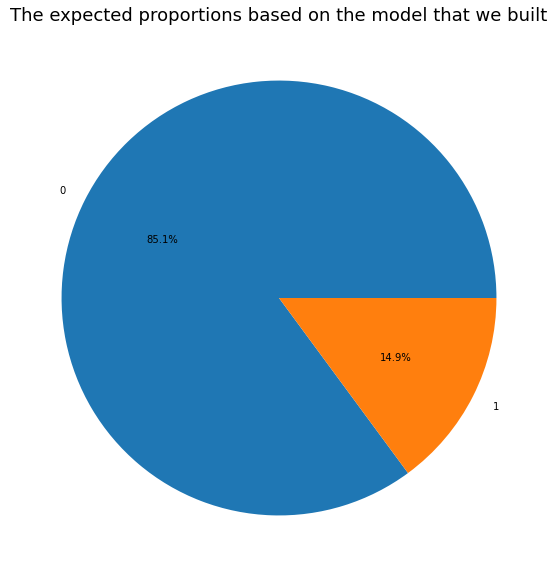

In [416]:
plt.figure(figsize=(20,10))
plt.title('The expected proportions based on the model that we built',size=18)
plt.pie(res,labels=res.index,autopct='%.01f%%')
plt.show()

#### Overall default rate if you buy all the mortages through predict model 85.1%